# 典型資料分析案例
## 利用Python實現報表自動化

In [1]:
# 匯入來源資料
import pandas as pd
from datetime import datetime
data = pd.read_csv(r"C:\ACD019600\data\order-14.1.csv",
                   parse_dates = ["成交時間"])
data.head()  #預覽數據
data.info()  #查看來源資料類型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 7 columns):
商品ID    3478 non-null float64
類別ID    3478 non-null float64
門市編號    3478 non-null object
單價      3478 non-null float64
銷量      3478 non-null float64
成交時間    3478 non-null datetime64[ns]
訂單ID    3478 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 204.8+ KB


In [2]:
# 計算本月相關指標
This_month = data[(data["成交時間"] >= datetime(2018,2,1))&
                (data["成交時間"] <= datetime(2018,2,28))]
sales_1 = (This_month["銷量"]*This_month["單價"]).sum()#銷售額計算
#客流量計算
traffic_1 = This_month["訂單ID"].drop_duplicates().count()
s_t_1 = sales_1/traffic_1#客單價計算
print("本月銷售額為:{:.2f},客流量為:{}, 客單價為:{:.2f}".format(sales_1,traffic_1,s_t_1))

本月銷售額為:10412.78,客流量為:343, 客單價為:30.36


In [3]:
# 計算上月相關指標
last_month = data[(data["成交時間"] >= datetime(2018,1,1))&
                (data["成交時間"] <= datetime(2018,1,31))]
sales_2 = (last_month["銷量"]*last_month["單價"]).sum() #銷售額計算

#客流量計算
traffic_2 = last_month["訂單ID"].drop_duplicates().count()
s_t_2 = sales_2/traffic_2 #客單價計算
print("本月銷售額為:{:.2f},客流量為:{}, 客單價為:{:.2f}".format(sales_2,traffic_2,s_t_2))

本月銷售額為:9940.97,客流量為:315, 客單價為:31.56


In [4]:
# 計算去年同期相關指標
same_month = data[(data["成交時間"] >= datetime(2017,2,1))&
                (data["成交時間"] <= datetime(2017,2,28))]
sales_3 = (same_month["銷量"]*same_month["單價"]).sum()#銷售額計算

#客流量計算
traffic_3 = same_month["訂單ID"].drop_duplicates().count()
s_t_3 = sales_3/traffic_3 #客單價計算
print("本月銷售額為:{:.2f},客流量為:{}, 客單價為:{:.2f}".format(sales_3,traffic_3,s_t_3))

本月銷售額為:8596.31,客流量為:262, 客單價為:32.81


In [5]:
# 利用函式提高編碼效率
def get_month_data(data):
    sale = ((data["單價"]*data["銷量"]).sum())
    traffic = data["訂單ID"].drop_duplicates().count()
    price = sale / traffic
    return (sale,traffic,price)

#計算本月相關指標
sale_1,traffic_1,s_t_1 = get_month_data(This_month)

#計算上月相關指標
sale_2,traffic_2,s_t_2 = get_month_data(last_month)

#計算去年同期相關指標
sale_3,traffic_3,s_t_3 = get_month_data(same_month)

In [6]:
report = pd.DataFrame([[sale_1,sale_2,sale_3], 
                       [traffic_1,traffic_2,traffic_3], 
                       [s_t_1,s_t_2,s_t_3]], columns = ["本月累計","上月同期","去年同期"], 
                      index = ["銷售額","客流量","客單價"])
report

,本月累計,上月同期,去年同期
銷售額,10412.780070,9940.972910,8596.313470
客流量,343.000000,315.000000,262.000000
客單價,30.357959,31.558644,32.810357


In [7]:
report["環比"] = report["本月累計"]/report["上月同期"] - 1
report["同比"] = report["本月累計"]/report["去年同期"] - 1
report


,本月累計,上月同期,去年同期,環比,同比
銷售額,10412.780070,9940.972910,8596.313470,0.047461,0.211308
客流量,343.000000,315.000000,262.000000,0.088889,0.309160
客單價,30.357959,31.558644,32.810357,-0.038046,-0.074745


In [8]:
report.to_csv(r"C:\ACD019600\data\report.csv", encoding = "utf-8-sig")

## 自動發送電子郵件

In [ ]:
import smtplib
from email import encoders
from email.header import Header
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.utils import parseaddr, formataddr
from email.mime.application import MIMEApplication


#寄件者email
asender="thisisdemo543@outlook.com"

#收件人email
areceiver="service@gotop.com.tw"

#副本email
acc = 'thisisdemo543@outlook.com'

#郵件主題
asubject = '這是一份測試郵件'  

#寄件者地址
from_addr = "thisisdemo543@outlook.com"

#郵件密碼（）
password="1234Data"

#郵件設定
msg = MIMEMultipart()
msg['Subject'] = asubject  
msg['to'] = areceiver  
msg['Cc'] = acc 
msg['from'] = "你的名字"

#郵件正文
body = "你好，這是一份測試郵件"

#添加郵件正文
msg.attach(MIMEText(body, 'plain', 'utf-8'))

#添加附件
#注意，這裡的檔案路徑是分隔線
xlsxpart = MIMEApplication(open('C:/ACD019600/data/這是附件.xlsx', 'rb').read())
xlsxpart.add_header('Content-Disposition', 
                          'attachment', 
                          filename='這是附件.xlsx')
msg.attach(xlsxpart) 

#設定郵箱伺服器位址及埠
smtp_server ="smtp-mail.outlook.com"
server = smtplib.SMTP(smtp_server, 587)
server.set_debuglevel(1)
server.ehlo()
server.starttls()

#登錄郵箱
server.login(from_addr, password)
#發送郵件
server.sendmail(from_addr, 
                      areceiver.split(',')+acc.split(','),
                      msg.as_string())
#斷開伺服器連接
server.quit()


## 假如你是某連鎖超市的資料分析師

In [27]:
import pandas as pd
from datetime import datetime
data = pd.read_csv(r"C:\ACD019600\data\order-14.3.csv",parse_dates = ["成交時間"])

In [28]:
data.groupby("類別ID")["銷量"].sum().reset_index()

,類別ID,銷量
0,910000000,24.0
1,910010000,7.0
2,910010002,1.0
3,910010101,6.0
4,910010301,2.0
5,910010400,1.0
6,910010500,4.0
7,910020000,10.0
8,910020102,1.0
9,910020104,31.0


In [29]:
data.groupby("類別ID")["銷量"].sum().reset_index().sort_values(by = "銷量",ascending = False).head(10)

,類別ID,銷量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


In [30]:
pd.pivot_table(data,index = "商品ID",values = "銷量",
        aggfunc = "sum").reset_index().sort_values(by = "銷量",ascending = False).head(10)


,商品ID,銷量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


In [31]:
data["銷售額"] = data["銷量"]*data["單價"]
data.groupby("門市編號")["銷售額"].sum()

門市編號
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 銷售額, dtype: float64

In [32]:
data.groupby("門市編號")["銷售額"].sum()/data["銷售額"].sum()

門市編號
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 銷售額, dtype: float64

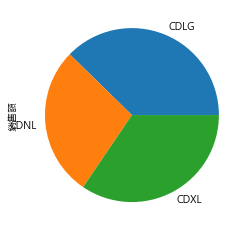

In [33]:
#繪製圓形圖
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='Microsoft JhengHei'

(data.groupby("門市編號")["銷售額"].sum()/data["銷售額"].sum()).plot.pie()

In [16]:
#利用自訂時間格式函式strftime提取小時數
data["小時"] = data["成交時間"].map(lambda x:int(x.strftime("%H")))

#對小時和訂單刪除重複
traffic = data[["小時","訂單ID"]].drop_duplicates()

#求每小時的客流量
traffic.groupby("小時")["訂單ID"].count()


小時
6      10
7      37
8     106
9     156
10    143
11     63
13     30
14     36
15     17
16     50
17     73
18     71
19     71
20     39
21     16
Name: 訂單ID, dtype: int64

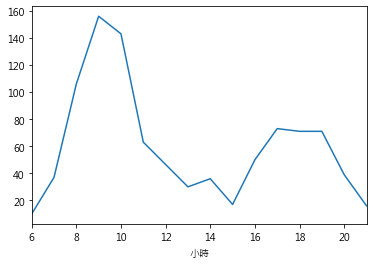

In [17]:
#繪製每小時客流量折線圖
traffic.groupby("小時")["訂單ID"].count().plot()

## 假如你是某銀行的資料分析師

In [18]:
#匯入資料來源
data = pd.read_csv(r"C:\ACD019600\data\loan.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用戶ID    150000 non-null int64
好壞客戶    150000 non-null int64
年齡      150000 non-null int64
負債率     150000 non-null float64
月收入     120269 non-null float64
眷屬數量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [19]:
data = data.fillna({"月收入":data["月收入"].mean()})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用戶ID    150000 non-null int64
好壞客戶    150000 non-null int64
年齡      150000 non-null int64
負債率     150000 non-null float64
月收入     150000 non-null float64
眷屬數量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [20]:
cut_bins=[0,5000,10000,15000,20000,100000]
income_cut=pd.cut(data["月收入"],cut_bins)
income_cut

0           (5000.0, 10000.0]
1               (0.0, 5000.0]
2               (0.0, 5000.0]
3               (0.0, 5000.0]
4         (20000.0, 100000.0]
5               (0.0, 5000.0]
6           (5000.0, 10000.0]
7               (0.0, 5000.0]
8           (5000.0, 10000.0]
9         (20000.0, 100000.0]
10              (0.0, 5000.0]
11          (5000.0, 10000.0]
12         (10000.0, 15000.0]
13         (10000.0, 15000.0]
14                        NaN
15         (10000.0, 15000.0]
16          (5000.0, 10000.0]
17          (5000.0, 10000.0]
18              (0.0, 5000.0]
19              (0.0, 5000.0]
20         (10000.0, 15000.0]
21              (0.0, 5000.0]
22              (0.0, 5000.0]
23          (5000.0, 10000.0]
24              (0.0, 5000.0]
25              (0.0, 5000.0]
26          (5000.0, 10000.0]
27              (0.0, 5000.0]
28              (0.0, 5000.0]
29          (5000.0, 10000.0]
                 ...         
149970     (15000.0, 20000.0]
149971          (0.0, 5000.0]
149972    

In [21]:
all_income_user = data["好壞客戶"].groupby(income_cut).count()
bad_income_user = data["好壞客戶"].groupby(income_cut).sum()
bad_rate = bad_income_user/all_income_user
bad_rate 

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好壞客戶, dtype: float64

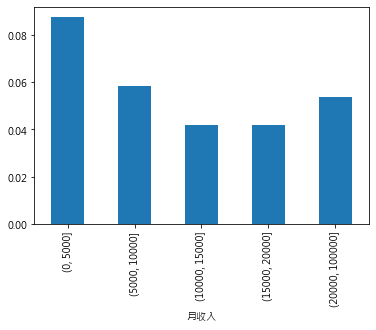

In [22]:
#繪製月收入與壞帳率關係圖
bad_rate.plot.bar()

In [23]:
age_cut=pd.qcut(data["年齡"],6)
all_age_user = data["好壞客戶"].groupby(age_cut).count()
bad_age_user = data["好壞客戶"].groupby(age_cut).sum()
bad_rate = bad_age_user/all_age_user
bad_rate

年齡
(-0.001, 37.0]    0.108201
(37.0, 45.0]      0.086841
(45.0, 52.0]      0.078956
(52.0, 59.0]      0.059600
(59.0, 67.0]      0.039205
(67.0, 109.0]     0.022498
Name: 好壞客戶, dtype: float64

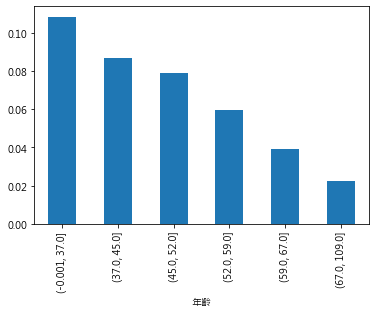

In [24]:
#繪製年齡與壞帳率關係圖
bad_rate.plot.bar()

In [25]:
all_age_user = data.groupby("眷屬數量")["好壞客戶"].count()
bad_age_user = data.groupby("眷屬數量")["好壞客戶"].sum()
bad_rate = bad_age_user/all_age_user
bad_rate

眷屬數量
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: 好壞客戶, dtype: float64

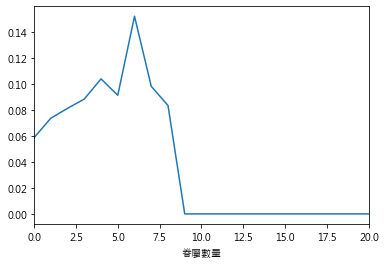

In [26]:
#繪製眷屬數量與壞帳率關係圖
bad_rate. plot()